In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt, cm
from sklearn.preprocessing import OneHotEncoder

In [4]:
print(tf.__version__)

1.15.2


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mnist/mnist_test.csv")
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/mnist/mnist_train.csv")

In [6]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train = np.array(train_data.iloc[:,1:]).reshape(60000, 28, 28, 1)
x_test = np.array(test_data.iloc[:,1:]).reshape(10000, 28, 28, 1)

In [0]:
def o_h_e(data):
  l=[]
  for i in data:
    temp = [0]*10
    temp[int(i)]=1
    l.append(temp)
  return (np.array(l))


In [0]:
y_train = o_h_e(train_data.iloc[:,0])
y_test = o_h_e(test_data.iloc[:,0])

In [11]:
y_test.shape

(10000, 10)

In [0]:
def plot(x):
  plt.imshow(np.array(x).reshape(28,28),cmap=cm.gray)

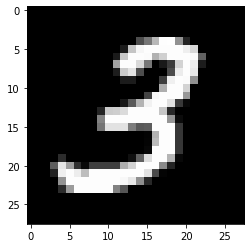

In [13]:
plot(x_train[157])

Classification using tensorflow for single layer 

In [0]:
def model(x_train, x_test, y_train, y_test, learning_rate =0.009, epoch =100, 
          batch_size= 64):
  """
    Conv2d -> Relu -> Max_pooling -> flatten -> fullyconnected
  """
  # create placeholders for input values 
  # create variables for weight and bais
  # forward propagation
  # compute cost
  # optimizer   
  m, image_x, image_y, image_h = x_train.shape
  classes = y_train.shape[1]

  # placeholders 
  X = tf.placeholder(tf.float32, [None, image_x, image_y, image_h])
  Y = tf.placeholder(tf.float32, [None, classes])

  # variables
  W = tf.get_variable("W",[4,4,image_h,1], initializer= tf.contrib.layers.xavier_initializer())
  
  # forward propagation
  Z = tf.nn.conv2d(X, W, strides=[1,1,1,1], padding = "SAME")
  A = tf.nn.relu(Z)
  pool = tf.nn.max_pool(A, ksize=[1,4,4,1], strides =[1,1,1,1], padding="SAME")
  flat_input = tf.contrib.layers.flatten(pool)
  fully_connected = tf.contrib.layers.fully_connected(flat_input, classes, activation_fn=None)
  # if binary classification use sigmoid 

  # cost
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =fully_connected, labels=Y))

  # optimizer
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

  intializer = tf.global_variables_initializer()
  
  costs= []
  with tf.Session() as sess:
    
    sess.run(intializer)
    # now session can hold all specified varibles and placeholders 
    
    for i in range(epoch):
        # place the functions you want to run in particular sessions
        _, c =sess.run([optimizer, cost],feed_dict={ X:x_train, Y:y_train})
        costs.append(c)
        if i%5==0:
          print("Cost after {} iteration : {}".format(i,c))
    
    # plot cost
    plt.plot(np.squeeze(costs))
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.title("learning rate {}".format(learning_rate))
    plt.show()

    # prediction
    predict_op = tf.argmax(fully_connected, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: x_train, Y: y_train})
    test_accuracy = accuracy.eval({X: x_test, Y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
                
    return train_accuracy, test_accuracy

Cost after 0 iteration : 90.2271499633789
Cost after 5 iteration : 49.79479217529297
Cost after 10 iteration : 20.341562271118164
Cost after 15 iteration : 10.476284980773926
Cost after 20 iteration : 6.414243698120117
Cost after 25 iteration : 4.369457244873047
Cost after 30 iteration : 3.035074472427368
Cost after 35 iteration : 2.2111032009124756
Cost after 40 iteration : 1.8208948373794556
Cost after 45 iteration : 1.7447031736373901
Cost after 50 iteration : 1.7422934770584106
Cost after 55 iteration : 1.6601715087890625
Cost after 60 iteration : 1.5468769073486328
Cost after 65 iteration : 1.4754573106765747
Cost after 70 iteration : 1.4412236213684082
Cost after 75 iteration : 1.4154173135757446
Cost after 80 iteration : 1.3873233795166016
Cost after 85 iteration : 1.3599061965942383
Cost after 90 iteration : 1.3367234468460083
Cost after 95 iteration : 1.317107081413269


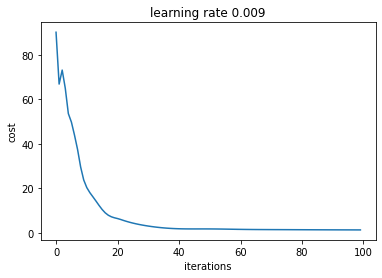

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.62308335
Test Accuracy: 0.6372


(0.62308335, 0.6372)

In [65]:
tf.reset_default_graph()

model(x_train, x_test, y_train, y_test)